# Part One: K-fold Cross Validation

The challenge of training machine learning models is to be able to make accurate predictions on previously unseen real-world data in spite of the fact that we only have a finite training dataset to learn from. 

One way of validating our model's quality-of-fit and avoiding overfitting/underfitting, is to use the test_train_split method like we did in the code challenge. With this method, the randomly selected test dataset can be used to evaluate how our model performs on data that it has not yet seen in the training process. However, there are downsides to this approach:

*   We lose a valuable portion of data that we would prefer to be able to train on to serve as the test dataset. We would prefer to have both the testing and training datasets be as large as possible.
*   With small datasets, measures of our model's quality using the test_train_split method often have a high variance. (We saw this behavior when we changed the random seed in the code challenge)

We can reduce the severity of both of these drawbacks by using what is called K-fold Cross Validation:

[Short Video Explaining K-Fold Cross Validation](https://www.youtube.com/watch?v=TIgfjmp-4BA)

[How to Implement K-Fold Cross Validation on the Pima Indians Diabetes dataset](https://machinelearningmastery.com/evaluate-performance-machine-learning-algorithms-python-using-resampling/)

## DO THIS:

**1)** Train a logistic regression model on the titanic dataset predicting survivors first using a 20-80% test_train_split and print the accuracy of your model using 5 different random seeds.

**2)** Use 5-fold Cross Validation on the titanic dataset. Print out the accuracies from each of the 5 folds of the cross validation, then print the final mean and standard deviation of those cross validation accuracies. How do the accuracies on each of the inidvidual folds compare to the accuracies of the test_train_split approach? Is the variance in accuracies of the cross-validation approach higher or lower than the variance of the test_train_split approach? 

**3)** Try using 3-fold Cross Validation as well as 10-fold cross validation. How does the number of folds in the cross-validation process affect the outcome? How many folds should be used?

---
I would give you more boilerplate code here, but I don't want to make it too easy. The articles linked above should be sufficient for this purpose.

In [0]:
##### YOUR CODE HERE ##### - Feel free to add code cells as necessary.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

titanic = sns.load_dataset('titanic')
titanic = titanic.drop(['alive','adult_male','who','class','embark_town'], axis=1)
titanic['embarked'] = titanic['embarked'].fillna(method='ffill')
titanic = titanic.drop(['deck'], axis=1)
titanic['age'] = titanic['age'].fillna(method='ffill')

# Convert binomials and categoricals to encoded labels
for label in ['embarked','sex', 'alone']:
    titanic[label] = LabelEncoder().fit_transform(titanic[label])

    
results1 = []

for seed in [1, 10, 25, 54, 75]:
  train_x, test_x, train_y, test_y = train_test_split(titanic.drop(['survived'], 1), titanic['survived'], test_size = 0.2, random_state=seed)

  regr = LogisticRegression()
  regr.fit(train_x,train_y)
  y_hat = regr.predict(test_x)
  
  s = accuracy_score(test_y, y_hat)* 100
  results1.append(s)
  
print(results1)
print(np.mean(results1))
print(np.std(results1))

[78.77094972067039, 81.00558659217877, 81.00558659217877, 77.09497206703911, 75.41899441340783]
78.65921787709496
2.1894880382419446


In [0]:
x = titanic.drop(['survived'], 1)
y = titanic['survived']

kfold = KFold(n_splits=5, random_state=42)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv=kfold)
print(results)
print("Accuracy: %.3f (%.3f)" % (results.mean()*100.0, results.std()*100.0))

[0.78212291 0.80337079 0.7752809  0.75842697 0.83707865]
Accuracy: 79.126 (2.707)


The accuracies of each individual fold are about the same as the test_train_split approach. The variance in accuracies of the cross-validation approach is higher than the variance of the test_train_split approach.

Folds: 2 Accuracy: 78.452 (0.874)
Folds: 7 Accuracy: 79.015 (1.828)
Folds: 12 Accuracy: 79.464 (2.997)
Folds: 17 Accuracy: 79.461 (3.683)
Folds: 22 Accuracy: 79.695 (3.577)
Folds: 27 Accuracy: 79.574 (5.569)
Folds: 32 Accuracy: 79.584 (4.905)
Folds: 37 Accuracy: 79.811 (5.677)
Folds: 42 Accuracy: 79.690 (7.971)
Folds: 47 Accuracy: 79.582 (8.372)
Folds: 52 Accuracy: 79.707 (8.398)
Folds: 57 Accuracy: 79.715 (9.393)
Folds: 62 Accuracy: 79.693 (10.119)
Folds: 67 Accuracy: 79.597 (11.044)
Folds: 72 Accuracy: 79.692 (10.174)
Folds: 77 Accuracy: 79.713 (10.114)
Folds: 82 Accuracy: 79.579 (11.273)
Folds: 87 Accuracy: 79.592 (12.720)
Folds: 92 Accuracy: 79.722 (11.862)
Folds: 97 Accuracy: 79.691 (12.305)


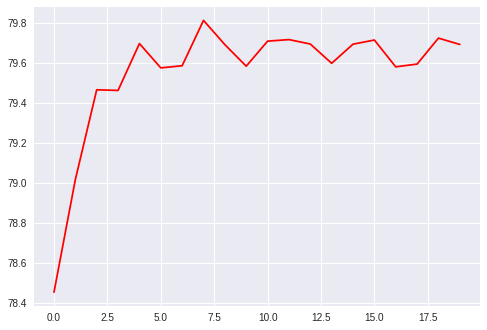

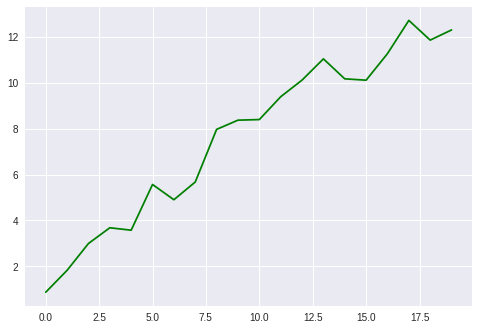

In [0]:
m = []
s = []

for k in range(2, 100, 5):
  kfold = KFold(n_splits=k, random_state=42)
  model = LogisticRegression()
  results = cross_val_score(model, x, y, cv=kfold)
  m.append(results.mean()*100)
  s.append(results.std()*100)
  print("Folds: %.0f Accuracy: %.3f (%.3f)" % (k, results.mean()*100.0, results.std()*100.0))
  
plt.plot(m, 'r')
plt.show()
plt.plot(s, 'g')
plt.show()

Increasing number of folds improves accuracy to a certain point. The standard deviation increases with the number of folds. The number of kfolds would probably depend on the size of the dataset and the amount of time available for calculations.


# Part Two: Hyperparameter Tuning

An important technique for improving the accuracy of a machine learning model is to undertake a process known as Hyperparameter Tuning or Hyperparameter Optimization. In order to understand this process, we first need to understand the difference between a model parameter and a model hyperparameter. 

### What is a model parameter?

A model parameter is a value that is generated by fitting our model to training data and is key to generating predictions with that model. They are **internal** to our model and we often are trying to estimate them as best as possible when we train the algorithm. 

For example, the parameters of a linear regression model would be its intercept value as well as the coefficient values on each of the X variables. Estimates of these crucial values (parameters) are obtained by fitting to the training data, perfectly define the model, are internal to the model, and are key to generating predictions. They are model parameters in every sense. 

### What is a model hyperparameter?

Hyperparameters are values that are key to how well our algorithm runs, yet are **external** to our model and cannot be estimated from the training process. They are more like settings for our algorithm which must be designated before it is run and impact its performance. Here is some further reading:

[Hyperparamters explanation on Quora](https://www.quora.com/What-are-hyperparameters-in-machine-learning)

[Jason Brownlee Article on the difference between Parameters and Hyperparameters](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/)

### How do we find the best hyperparameters?

Since we can't learn the best hyperparameters for our model from the data, we essentially just pick values and see which ones lead to the highest accuracy. This can be a tedious and complex process especially for certain models like neural networks which can have dozens of hyperparameters. We will get you familiar with the process using a more simple logistic regression model. 

### How do you know what hyperparameters exist for your particular model? 

Most models/libraries have default hyperparameters that will be used if we don't specify them. In the model selection process you might try out multiple models on a dataset and see which one gets you the highest out-of-the-box performance, (using the default hyperparameters) and then pick a couple of the highest performing algorithms and attempt hyperparameter tuning on them to compare how different models benefit from this process. Once you have narrowed down the models that you would like to tune, a quick google search can tell you what hyperparameters exist for that algorithm. 

Often you can learn about potential hyperparameters by looking at the documentation for a given algorithm in a library, here's the documentation for sklearn's logistic regression, see if you can spot the hyperparameters:

[scikit-learn logistic regression docs](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)



## DO THIS: 

Lets hyperparameter tune our **titanic** predictions using 5-fold cross validation to compare the accuracy of our tuned models. 

### Manual Hyperparameter Tuning:

For our assignment today we are going to tune the 'C value' also known as the 'regularization strength' of our logistic regression as well as 'penalty' of our logistic regression algorithm.

Read up on the regularlization strength and penalty of a logistic regression function. What might be some good values to test out? Hint: Look at the parameter definitions on the sci-kit learn logistic regression documentation. 

[scikit-learn logistic regression docs](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)

[Regularization in Logistic Regression](https://www.kdnuggets.com/2016/06/regularization-logistic-regression.html)

Fit your model 5 different times using 5 different C values of your choosing. Which value gives the highest accuracy? 

There are only two penalty values that we can use. Evaluate the model two more times using each penalty once. Which penalty gives the highest accuracy?

In [0]:
# The sample code below uses the Pima Indans Diabetes Dataset. 
# Here we are setting the C value hyperparameter to 1 and the penalty hyperparameter to "l1". 
# You can designate your hyperparameters in a similar fashion.

import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_instances = len(X)
seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=seed)
model = LogisticRegression(C=1, penalty='l1') ##### This is the important line
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results)

[0.75974026 0.72727273 0.76623377 0.83006536 0.76470588]


In [0]:
##### YOUR CODE HERE ##### - Feel free to add as many code cells as necessary.

for c in [1e-2, 1e-1, 1e0, 1e1, 1e2]:
  model = LogisticRegression(C=c, penalty='l1') ##### This is the important line
  results = model_selection.cross_val_score(model, X, Y, cv=kfold)
  print("Accuracy: %.3f (%.3f)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 67.845 (3.766)
Accuracy: 75.398 (4.460)
Accuracy: 76.960 (3.341)
Accuracy: 77.091 (3.504)
Accuracy: 77.091 (3.504)


Higher C gives a higher accuracy.

In [0]:
 for l in ['l1', 'l2']:
  model = LogisticRegression(C=10, penalty=l) ##### This is the important line
  results = model_selection.cross_val_score(model, X, Y, cv=kfold)
  print("Accuracy: %.3f (%.3f)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.091 (3.504)
Accuracy: 76.960 (3.341)


L1 gives better accuracy.

### 1) Grid-Search Hyperparameter Tuning:

Imagine that your algorithm has 12 different potential hyperparameters and each them can take on 5 different values. Lets say that it takes your laptop 4 seconds to fit each fold of cross validation. For each 5-fold cross-validation it would then take 20 seconds to fit your model and get an accuracy reading reported back. Now imagine that you want to test every possible combination of hyperparameters on your algorithm to get the absolute highest accuracy. You can see how this might become exceedingly tedious and time-consuming to perform by hand. Some hyperparameters (like the C value) have much more than 5 potential values, making hyperparameter tuning a huge task. 

It is for this reason that more advanced optimization techniques exist, one of which we will be exploring today called GridSearch.

### What does GridSearch do?

GridSearch takes a dictionary of all of the different hyperparameters that you want to test, and then feeds all of the different combinations through the algorithm for you and then reports back to you which one had the highest accuracy. Pretty slick right? 

Here is some boilerplate code you can reference to create your implementations:

[Chris Albon Logistic Regression sklearn Hyperparameter Tuning with GridSearch](https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/)

In [0]:
# These import statements might be useful to you. 
import numpy as np
from sklearn.model_selection import GridSearchCV

In [0]:
# Create logistic regression object

logistic = LogisticRegression()

In [0]:
# Create a list of all of the different penalty values that you want to test and save them to a variable called 'penalty'

penalty = ['l1', 'l2']

In [0]:
# Create a list of all of the different C values that you want to test and save them to a variable called 'C'

C = np.logspace(0, 4, 10)

In [0]:
# Now that you have two lists each holding the different values that you want test, use the dict() function to combine them into a dictionary. 
# Save your new dictionary to the variable 'hyperparameters'
# Print out the dictionary if you're curious as to what it euds up looking like.

hyperparameters = dict(C=C, penalty=penalty)

In [0]:
# Fit your model using gridsearch

clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X, Y)

In [0]:
# Print the best penalty and C value from best_model.best_estimator_.get_params()

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 7.742636826811269


In [0]:
# Print out all of the different combinations of your grid search values and their corresponding accuracies.
# https://stackoverflow.com/questions/22155953/how-to-print-out-an-accuracy-score-for-each-combination-within-gridsearch

best_model.predict(X)

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.